In [10]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv' que contiene los datos de la busqueda de los usuarios en el sistema Koha
df_auxiliar = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/1 - archivos/df_filtrado.csv", sep=',')


### Exploración de los datos luego de la etapa de limpieza
##### En este etapa, conoceros más a fondo los datos. Se harán algunas representaciones graficas para visualizar con facilidad los resultados encontrados

In [12]:
# Mostramos las primeras filas del data frame filtrado
df_auxiliar.head()

,sessionid,query_desc,total,time,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:27:49,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",16,2018-10-17 15:28:25,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:29:51,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:02,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",10,2018-10-17 15:30:13,DOCENTE


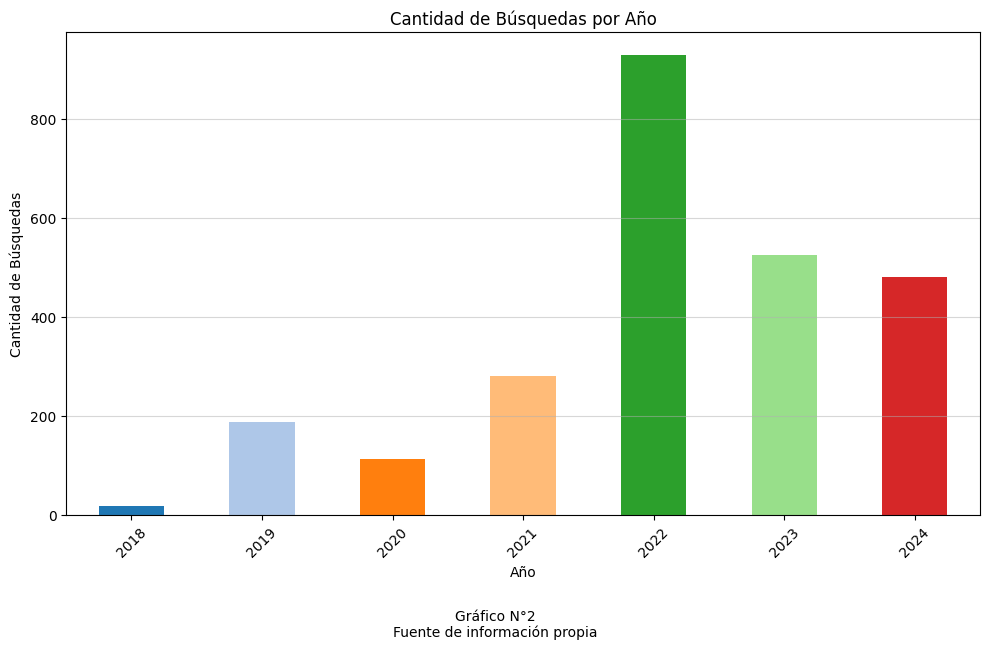

In [13]:
# Pasamos el 'time' de la busqueda a formato tiempo para extraer el año y contabilizarlos
df_auxiliar['time'] = pd.to_datetime(df_auxiliar['time'])
df_auxiliar['año'] = df_auxiliar['time'].dt.year

total_busquedas = df_auxiliar['año'].value_counts().sort_index()

# Grafico para el total de busquedas por año con colores diferentes
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(range(len(total_busquedas)))
total_busquedas.plot(kind='bar', color=colors)
plt.title('Cantidad de Búsquedas por Año')
plt.figtext(0.5, -0.05, 'Gráfico N°2\nFuente de información propia', ha='center', va='center')
plt.xlabel('Año')
plt.ylabel('Cantidad de Búsquedas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
# Buscamos el usuario con más búsquedas dentro del sistema
maximo_usuario_busqueda = df_auxiliar['sessionid'].value_counts().sort_index()
print("El usuario con más busquedas en el sistema es: ")
maximo_usuario_busqueda[maximo_usuario_busqueda == maximo_usuario_busqueda.max()]

El usuario con más busquedas en el sistema es: 


sessionid
e03def7e497ec6c9bb60f290d5247dc8    49
Name: count, dtype: int64

In [15]:
cantidad_usuarios = df_auxiliar['sessionid'].nunique()
print("La cantidad de usuarios que hicieron una búsqueda en el sistema son:", cantidad_usuarios)

La cantidad de usuarios que hicieron una búsqueda en el sistema son: 853


categorycode
AGRO             6
BIBLIOTECA    2048
BIOINF           6
BIOINGENIE      29
DOCENTE        164
HIST            83
INTERALUM        2
INVI            54
S              121
TEC_MED_N       21
TEC_PROD_M       1
Name: count, dtype: int64


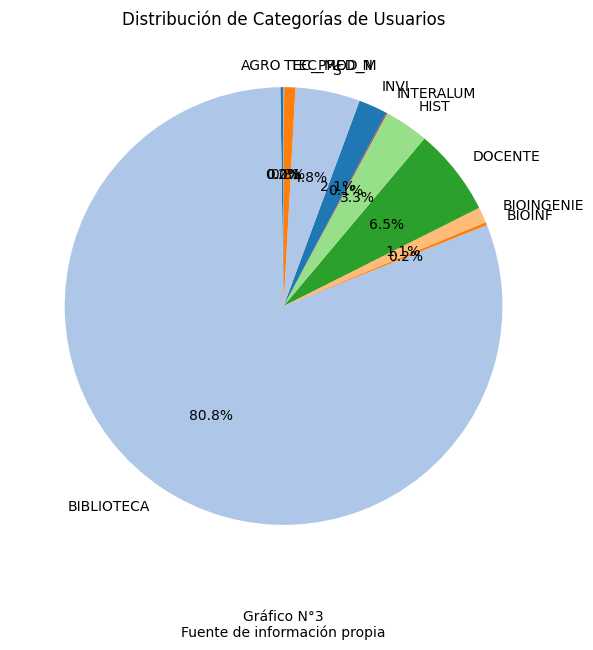

In [16]:
total_categorias = df_auxiliar['categorycode'].value_counts().sort_index()
print(total_categorias)

# Grafico de torta para total_categorias sin generalizar
plt.figure(figsize=(10, 6))
total_categorias.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de Categorías de Usuarios')
plt.ylabel('')
plt.figtext(0.5, -0.05, 'Gráfico N°3\nFuente de información propia', ha='center', va='center')
plt.tight_layout()
plt.show()

In [17]:
# Definimos un diccionario para mapear las categorías originales a las categorías generalizadas
diccionario_categorias = {
    'AGRO': 'Fuera de la Biblioteca',
    'BIBLIOTECA': 'Dentro de la Biblioteca',
    'BIOINF': 'Fuera de la Biblioteca',
    'BIOINGENIE': 'Fuera de la Biblioteca',
    'DOCENTE': 'Fuera de la Biblioteca',
    'HIST': 'Fuera de la Biblioteca',
    'INTERALUM': 'Fuera de la Biblioteca',
    'INVI': 'Fuera de la Biblioteca',
    'S': 'Fuera de la Biblioteca',
    'TEC_MED_N': 'Fuera de la Biblioteca',
    'TEC_PROD_M': 'Fuera de la Biblioteca'
}

# Aplicamos el mapeo a la columna 'categorycode'
df_auxiliar['categorycode_generalizado'] = df_auxiliar['categorycode'].map(diccionario_categorias)

categorycode_generalizado
Dentro de la Biblioteca    2048
Fuera de la Biblioteca      487
Name: count, dtype: int64


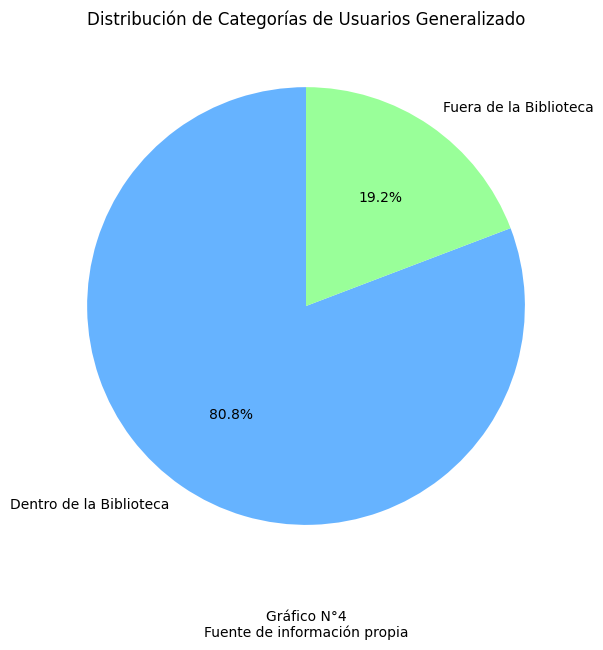

In [18]:
# Definir una nueva paleta de colores más representativa
colores_representativos = ['#66b3ff','#99ff99']

# Grafico de torta para total_categorias generalizado
total_categorias_generalizado = df_auxiliar['categorycode_generalizado'].value_counts().sort_index()
print(total_categorias_generalizado)

plt.figure(figsize=(10, 6))
total_categorias_generalizado.plot(kind='pie', autopct='%1.1f%%', colors=colores_representativos, startangle=90)
plt.title('Distribución de Categorías de Usuarios Generalizado')
plt.ylabel('')
plt.figtext(0.5, -0.05, 'Gráfico N°4\nFuente de información propia', ha='center', va='center')
plt.tight_layout()
plt.show()